In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score , mean_absolute_error
from sklearn.preprocessing import LabelEncoder


In [116]:
data = pd.read_csv("Chennai houseing sale.csv")
data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [118]:
data.drop(['DATE_SALE','UTILITY_AVAIL','MZZONE'],axis =1, inplace = True)

In [120]:
data.head(2)

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,STREET,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,Paved,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,Gravel,4.9,4.2,2.5,3.765,760122,304049,21717770


In [122]:
data.shape

(7109, 19)

In [124]:
data.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
STREET            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [126]:
mean =data['QS_OVERALL'].mean(axis = 0)
mean

3.5032537884152384

In [132]:
data['QS_OVERALL'].fillna(mean,inplace = True)

C:\Users\Chandru\AppData\Local\Temp\ipykernel_12056\3030972764.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['QS_OVERALL'].fillna(mean,inplace = True)


In [134]:
data.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        1
N_BATHROOM       5
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
STREET           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [136]:
data.dropna(inplace = True)

In [138]:
data.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
STREET           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [140]:
data.head(10)

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,STREET,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,Paved,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,Gravel,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,Gravel,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,18-03-1988,Others,Paved,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,Gravel,3.0,2.5,4.1,3.290,237000,74063,7406250
5,P00219,Chrompet,1220,36,2.0,1.0,4,Partial,No,12-09-2009,Commercial,No Access,4.5,2.6,3.1,3.320,409027,198316,12394750
6,P09105,Chrompet,1167,137,1.0,1.0,3,Partial,No,12-04-1979,Other,No Access,3.6,2.1,2.5,2.670,263152,33955,8488790
7,P09679,Velachery,1847,176,3.0,2.0,5,Family,No,15-03-1996,Commercial,Gravel,2.4,4.5,2.1,3.260,604809,235204,16800250
8,P03377,Chrompet,771,175,1.0,1.0,2,AdjLand,No,14-04-1977,Others,Paved,2.9,3.7,4.0,3.550,257578,33236,8308970
9,P09623,Velachery,1635,74,2.0,1.0,4,AbNormal,No,26-06-1991,Others,No Access,3.1,3.1,3.3,3.160,323346,121255,8083650


In [142]:
x = data[[ 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',   'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS']]
y = data['SALES_PRICE']

In [144]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [146]:
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [148]:
y_pred = model.predict(x_test)

In [150]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2398027960034.86


In [152]:
print(f"Model Coefficients: {model.coef_}")

Model Coefficients: [-1.44910022e+03  2.94751933e+02 -1.44746994e+06 -1.00919015e+06
  2.11957761e+06 -5.28803313e+04 -1.26233836e+05 -1.01280127e+05
  2.87027381e+05  1.94557639e+01  4.73551537e+00]


In [154]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [158]:
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error: 1244769.6799659387
Root Mean Squared Error: 1548556.7345224584
R² Score: 0.8348214922451211


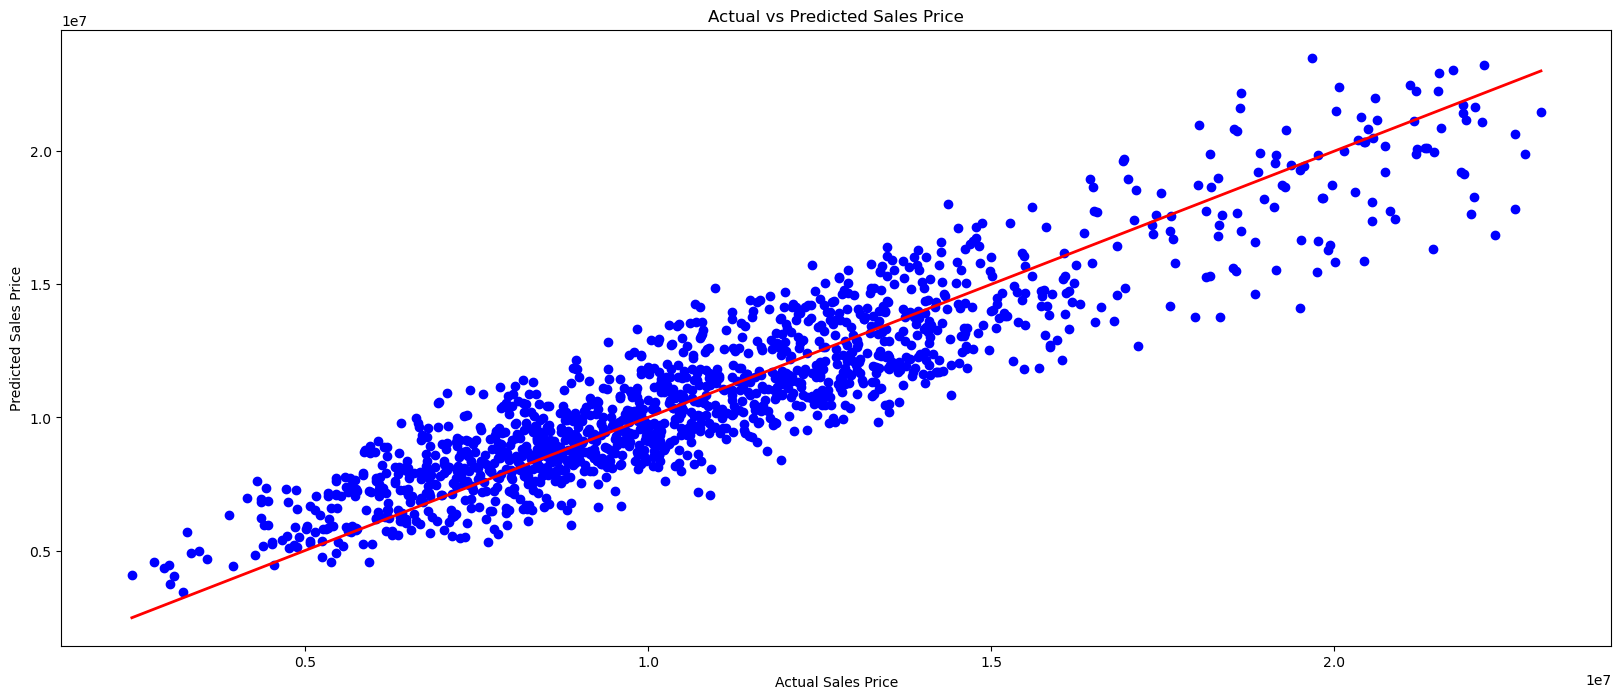

In [162]:
plt.figure(figsize=(20, 8))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Actual Sales Price')
plt.ylabel('Predicted Sales Price')
plt.title('Actual vs Predicted Sales Price')
plt.show()
